# Data Loading

In [2]:
import pandas as pd
import numpy as np

In [3]:
customer_data = pd.read_csv("Customer-Churn.csv")

# Initial EDA

In [5]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
customer_data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [7]:
customer_data = customer_data.drop(columns=['customerID'])

In [8]:
print(f"there are {len(customer_data)} rows.")
print(f"there are {len(customer_data.columns)} columns.")

there are 7043 rows.
there are 20 columns.


In [9]:
customer_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Categorical Variable EDA

In [11]:
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

all_value_counts = []

for column in categorical_variables:
    
    value_counts = customer_data[column].value_counts()
    frequency = round(customer_data[column].value_counts(normalize=True) * 100, 2)
    
    value_counts_df = pd.DataFrame({'Category': value_counts.index,
                                    'Count': value_counts.values, 
                                    'Frequency %': frequency.values})
    
    value_counts_df['Variable'] = column
    
    all_value_counts.append(value_counts_df)
    
cat_value_counts = pd.concat(all_value_counts, ignore_index = True)
    
print(cat_value_counts)

                     Category  Count  Frequency %          Variable
0                        Male   3555        50.48            gender
1                      Female   3488        49.52            gender
2                           0   5901        83.79     SeniorCitizen
3                           1   1142        16.21     SeniorCitizen
4                          No   3641        51.70           Partner
5                         Yes   3402        48.30           Partner
6                          No   4933        70.04        Dependents
7                         Yes   2110        29.96        Dependents
8                         Yes   6361        90.32      PhoneService
9                          No    682         9.68      PhoneService
10                         No   3390        48.13     MultipleLines
11                        Yes   2971        42.18     MultipleLines
12           No phone service    682         9.68     MultipleLines
13                Fiber optic   3096        43.9

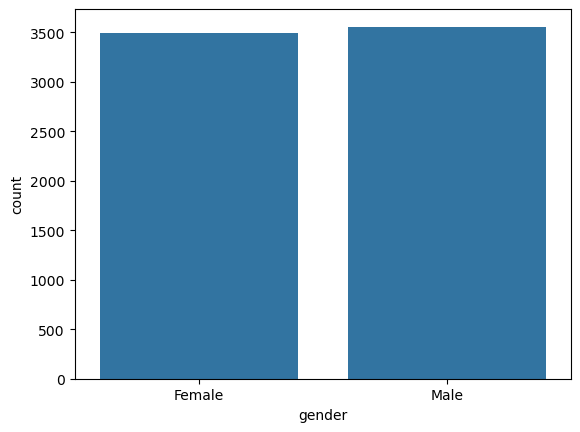

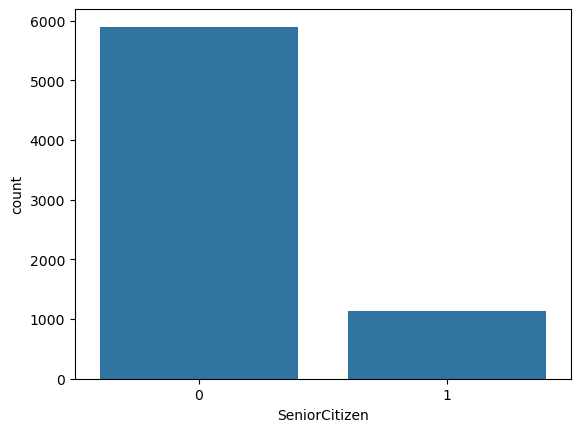

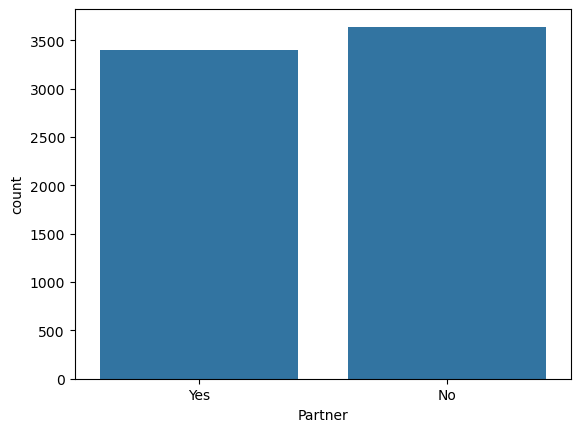

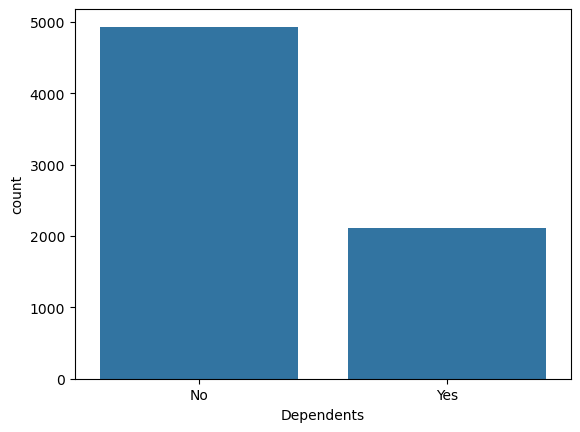

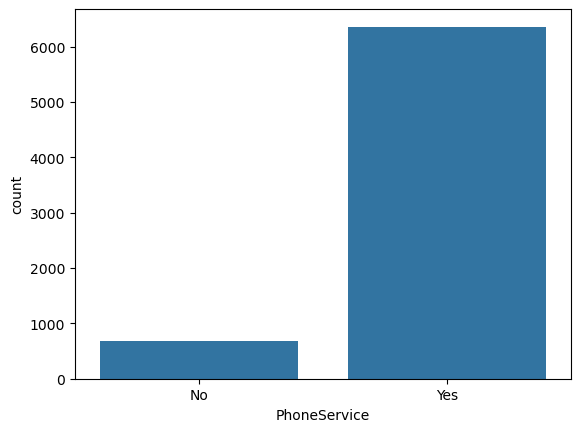

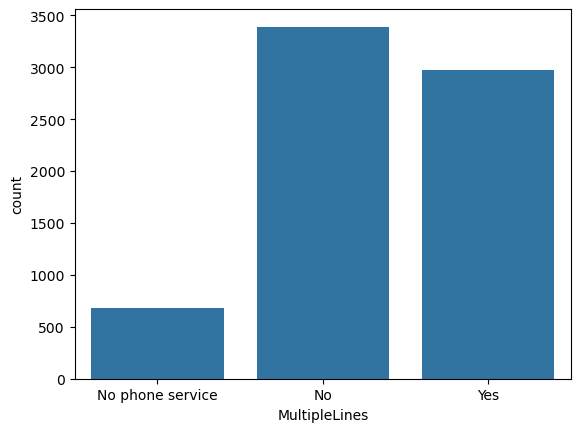

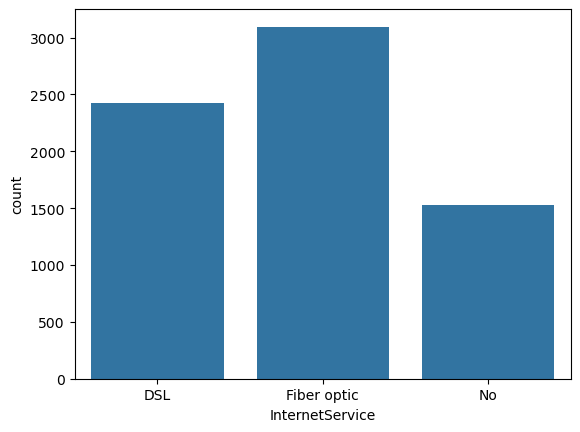

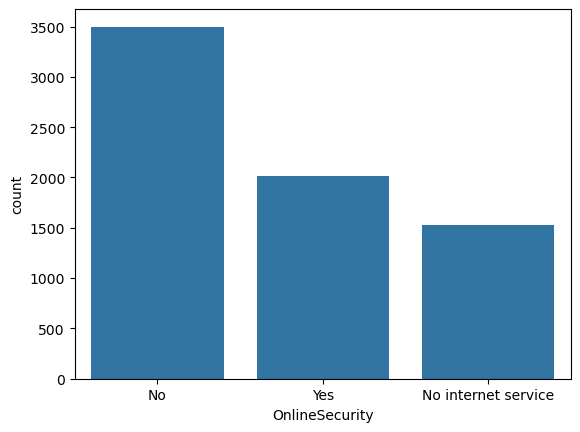

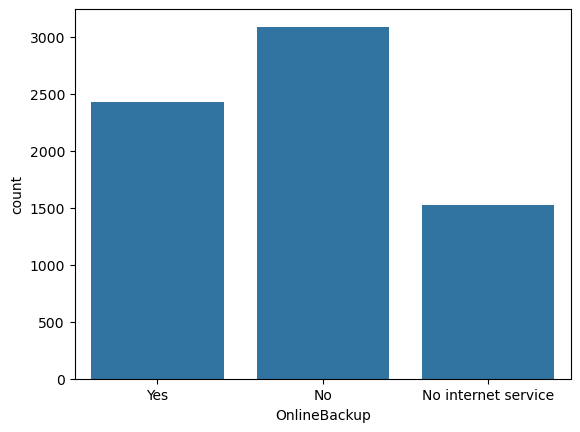

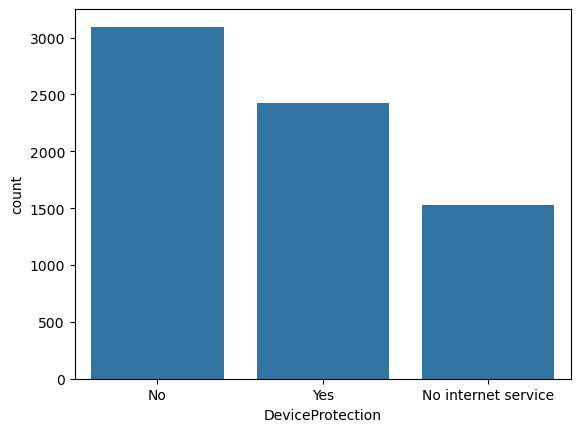

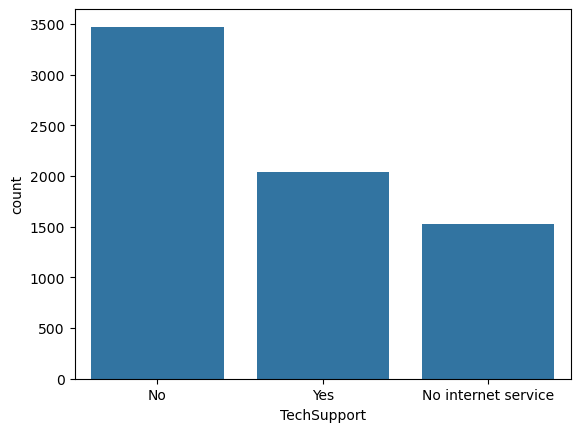

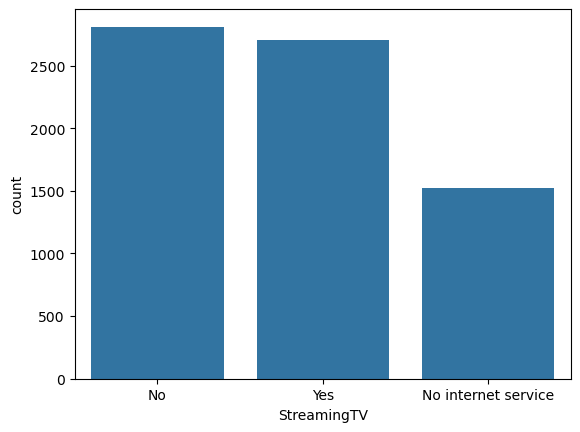

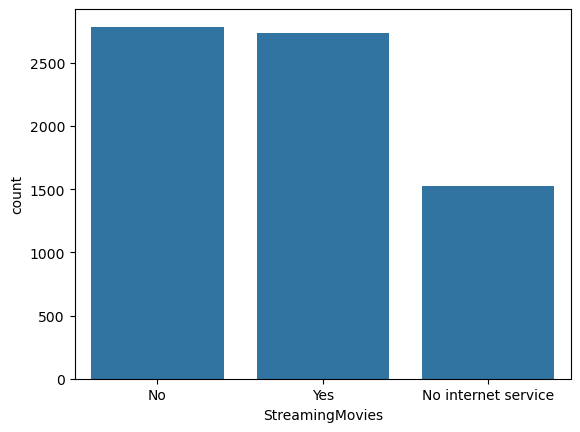

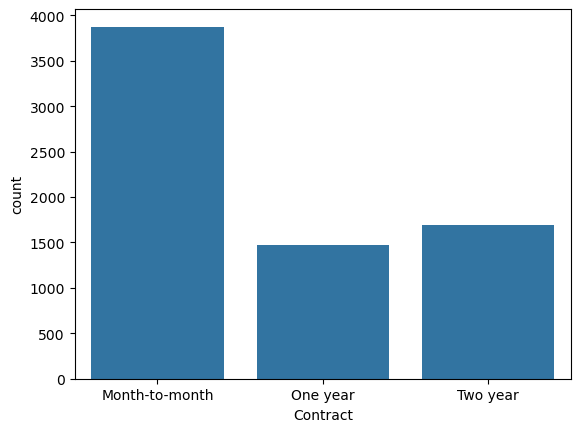

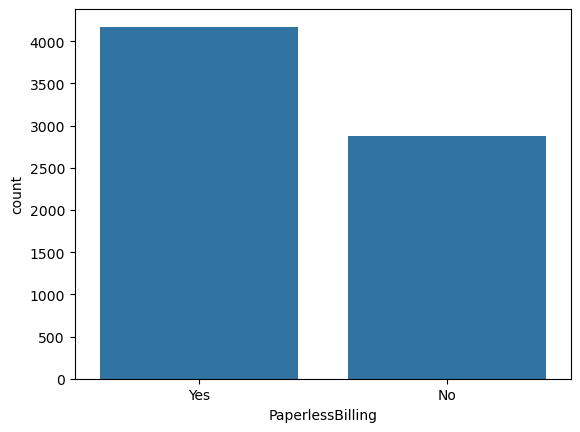

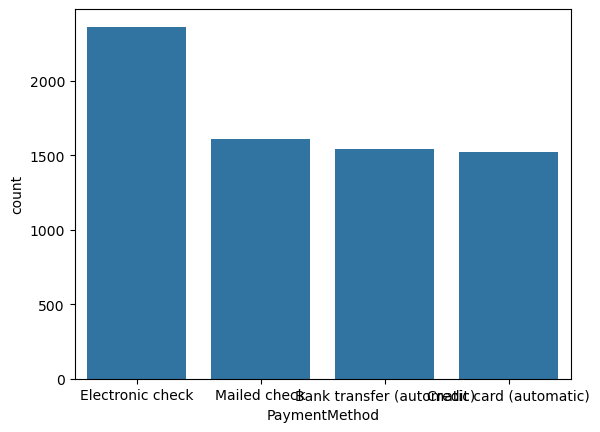

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in categorical_variables:
    sns.countplot(data= customer_data, x=column)
    plt.show()

In [13]:
for column in categorical_variables:
    crosstab = pd.crosstab(customer_data[column], customer_data['Churn'])
    print(f"Crosstab for {column}: \n")
    print(crosstab)
    print("\n")

Crosstab for gender: 

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


Crosstab for SeniorCitizen: 

Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476


Crosstab for Partner: 

Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669


Crosstab for Dependents: 

Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326


Crosstab for PhoneService: 

Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699


Crosstab for MultipleLines: 

Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850


Crosstab for InternetService: 

Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


Crosstab for OnlineSecurity: 

Churn                  No   Yes


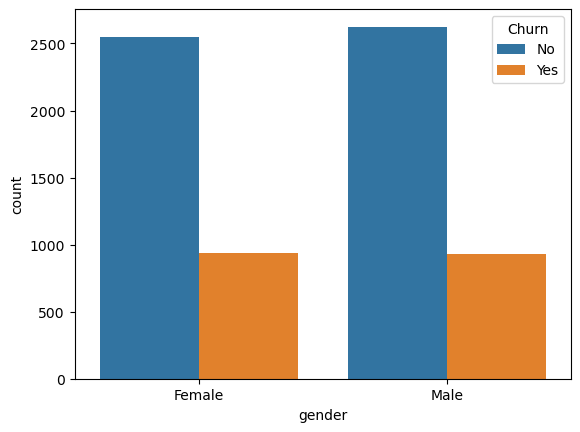

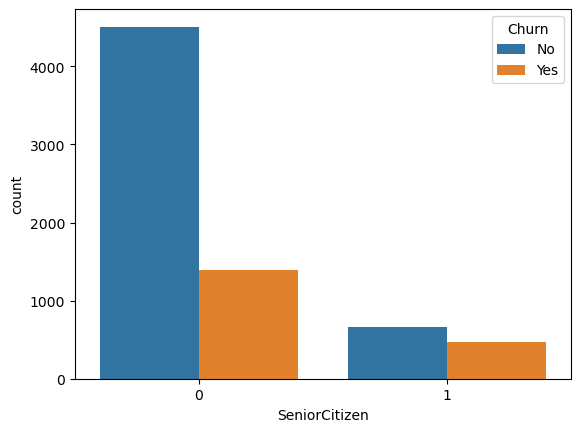

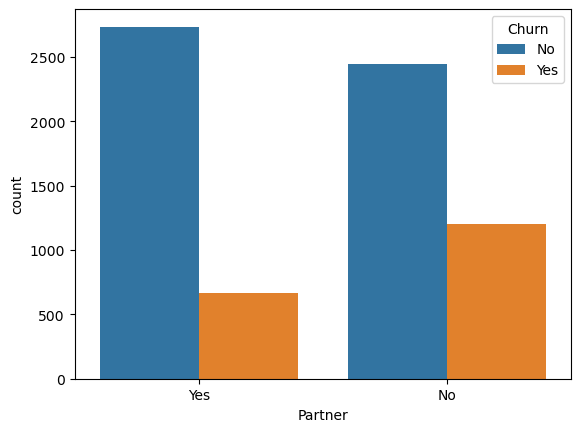

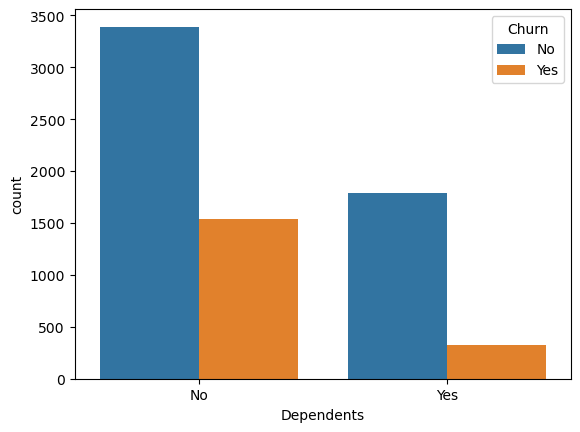

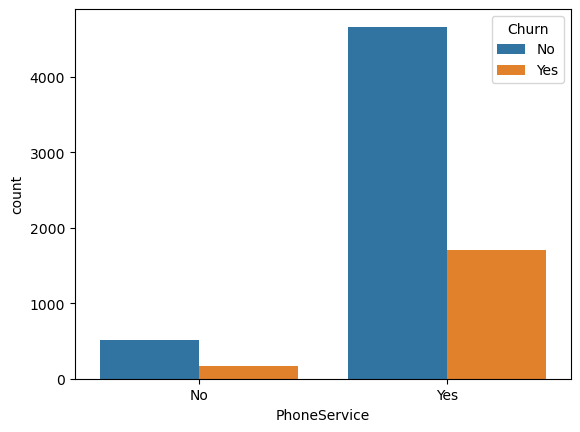

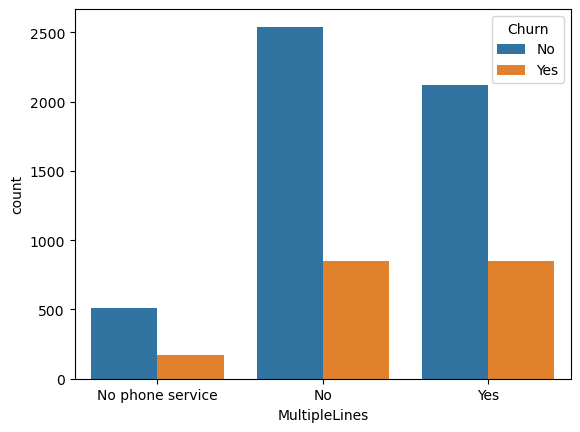

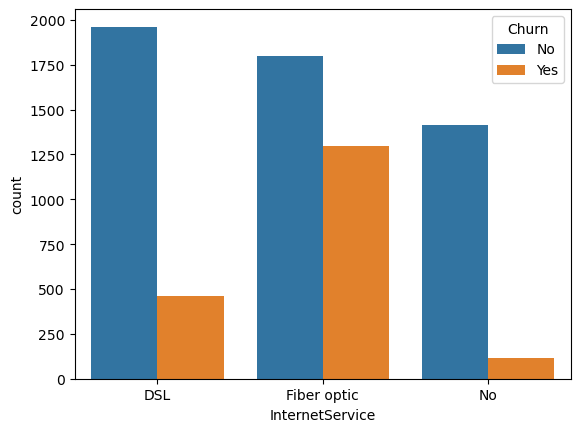

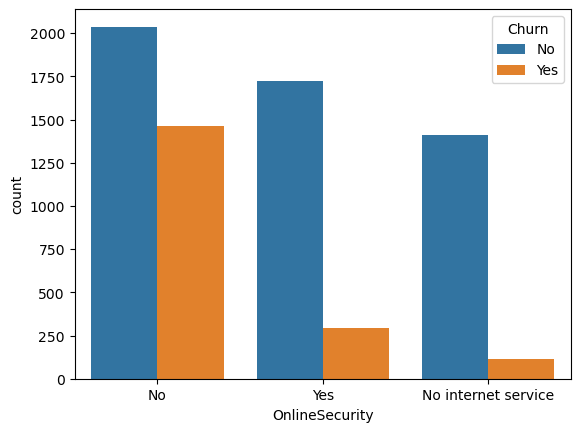

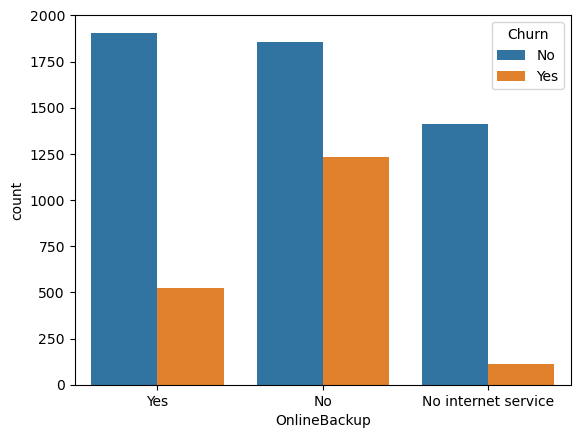

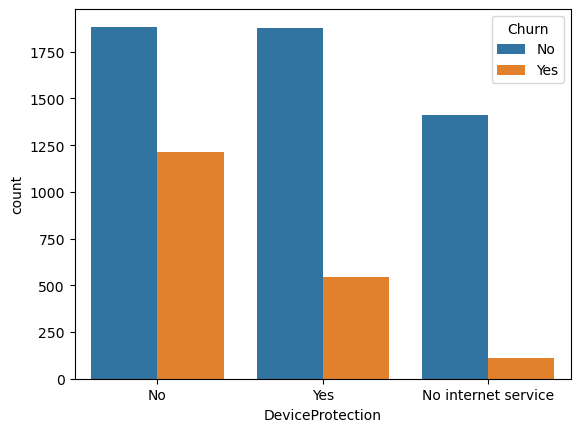

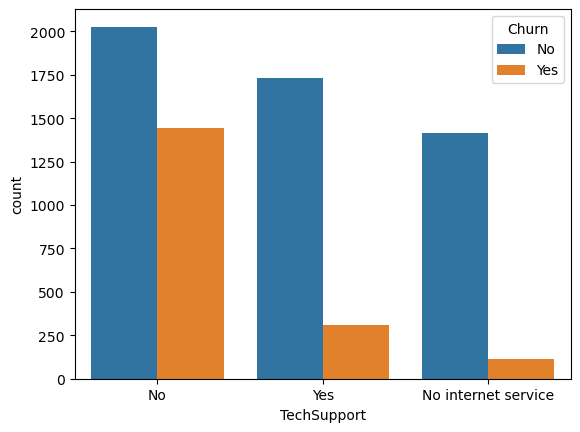

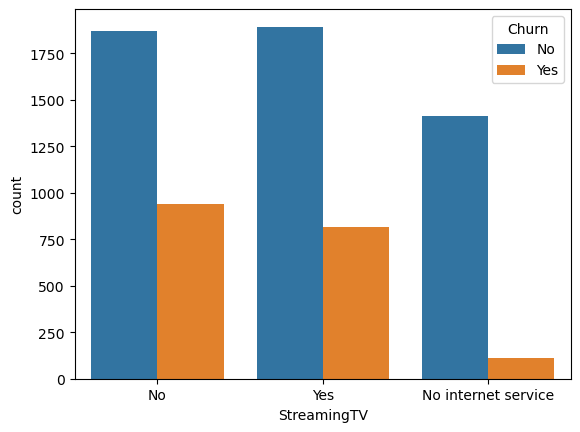

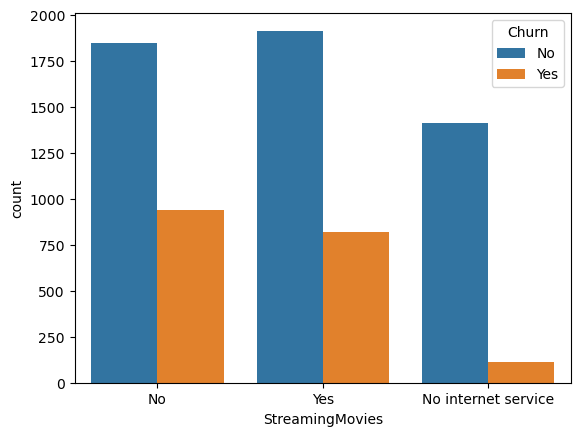

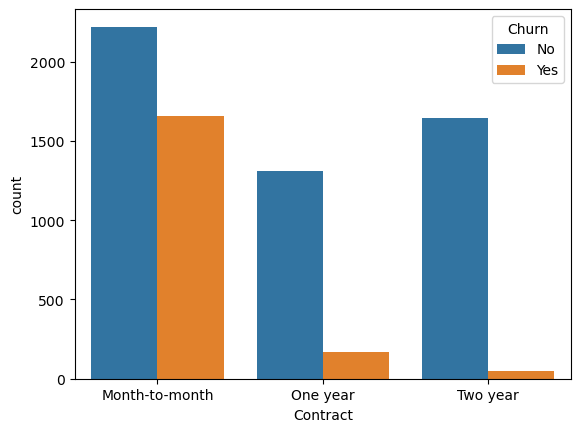

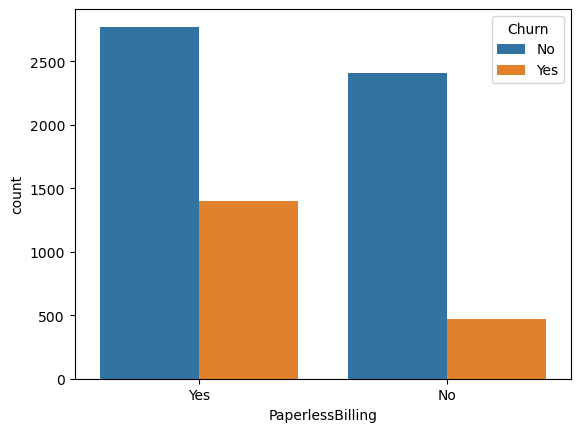

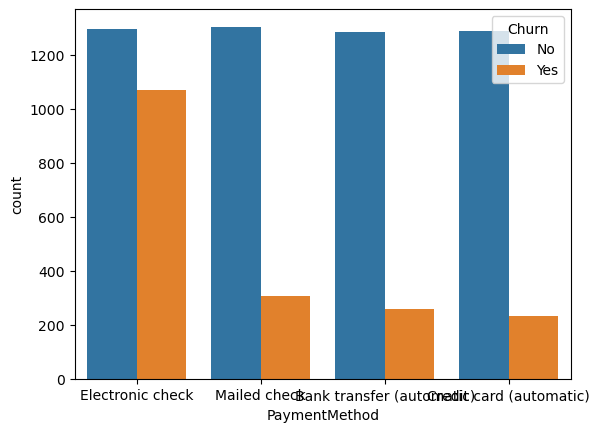

In [14]:
for column in categorical_variables:
    plt.figure()
    sns.countplot(data= customer_data, x = column, hue = 'Churn')
    plt.show()

In [15]:
customer_data['Churn'] = customer_data['Churn'].map({'Yes':1, 'No':0})

for column in categorical_variables:
    print(customer_data.groupby(column)['Churn'].mean())
    print("\n")

gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64


SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64


Partner
No     0.329580
Yes    0.196649
Name: Churn, dtype: float64


Dependents
No     0.312791
Yes    0.154502
Name: Churn, dtype: float64


PhoneService
No     0.249267
Yes    0.267096
Name: Churn, dtype: float64


MultipleLines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: Churn, dtype: float64


InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64


OnlineSecurity
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn, dtype: float64


OnlineBackup
No                     0.399288
No internet service    0.074050
Yes                    0.215315
Name: Churn, dtype: float64


DeviceProtection
No                     0.391276
No internet service    0.074050
Yes                    0.

In [16]:
from scipy.stats import chi2_contingency

chi2_results = []

for column in categorical_variables:
    contingency_table = pd.crosstab(customer_data[column], customer_data['Churn'])
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    chi2_results.append({
        'Variable': column,
        'Chi2 Statistic': chi2,
        'Degrees of Freedom': dof,
        'P-Value': p
    })
    
chi2_results_df = pd.DataFrame(chi2_results)

chi2_results_df.sort_values('P-Value', inplace=True)

print(chi2_results_df)

            Variable  Chi2 Statistic  Degrees of Freedom        P-Value
13          Contract     1184.596572                   2  5.863038e-258
7     OnlineSecurity      849.998968                   2  2.661150e-185
10       TechSupport      828.197068                   2  1.443084e-180
6    InternetService      732.309590                   2  9.571788e-160
15     PaymentMethod      648.142327                   3  3.682355e-140
8       OnlineBackup      601.812790                   2  2.079759e-131
9   DeviceProtection      558.419369                   2  5.505219e-122
12   StreamingMovies      375.661479                   2   2.667757e-82
11       StreamingTV      374.203943                   2   5.528994e-82
14  PaperlessBilling      258.277649                   1   4.073355e-58
3         Dependents      189.129249                   1   4.924922e-43
1      SeniorCitizen      159.426300                   1   1.510067e-36
2            Partner      158.733382                   1   2.139

# Numerical EDA

In [18]:
customer_data['TotalCharges'] = pd.to_numeric(customer_data['TotalCharges'], errors='coerce')

In [19]:
missing_total_charges = customer_data['TotalCharges'].isna().sum()
print(f"Missing values in TotalCharges: {missing_total_charges}")

Missing values in TotalCharges: 11


In [20]:
# na total charge rows = customers with 0 tenure
rows_with_na = customer_data[customer_data.isna().any(axis=1)]

print(rows_with_na)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

In [21]:
customer_data['TotalCharges'] = customer_data['TotalCharges'].fillna(0)

In [22]:
missing_total_charges = customer_data['TotalCharges'].isna().sum()
print(f"Missing values in TotalCharges: {missing_total_charges}")

Missing values in TotalCharges: 0


In [23]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in numerical_columns:
    print(f"Summary for {column}:")
    print(f"Mean: {customer_data[column].mean()}")
    print(f"Median: {customer_data[column].median()}")
    print(f"Standard Deviation: {customer_data[column].std()}")
    print(f"Range: {customer_data[column].min()} - {customer_data[column].max()}")
    print("\n")

Summary for tenure:
Mean: 32.37114865824223
Median: 29.0
Standard Deviation: 24.55948102309423
Range: 0 - 72


Summary for MonthlyCharges:
Mean: 64.76169246059918
Median: 70.35
Standard Deviation: 30.09004709767854
Range: 18.25 - 118.75


Summary for TotalCharges:
Mean: 2279.7343035638223
Median: 1394.55
Standard Deviation: 2266.7944696890195
Range: 0.0 - 8684.8




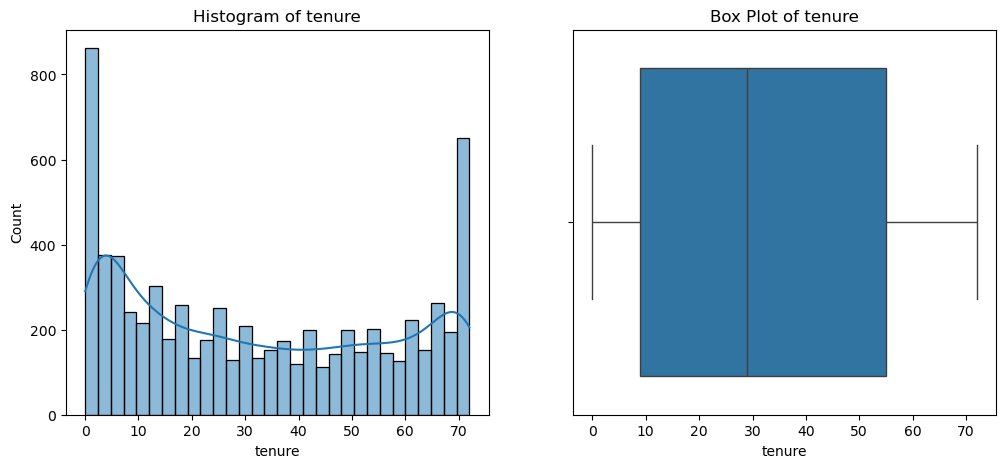

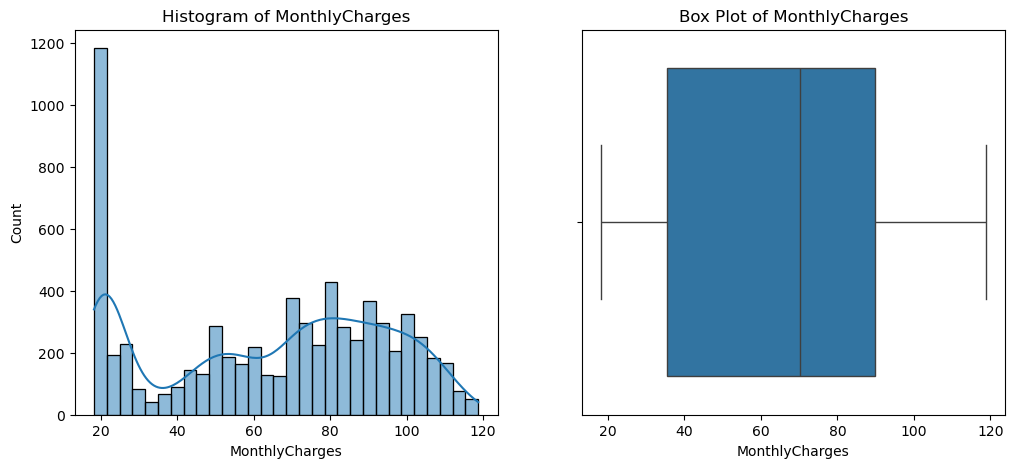

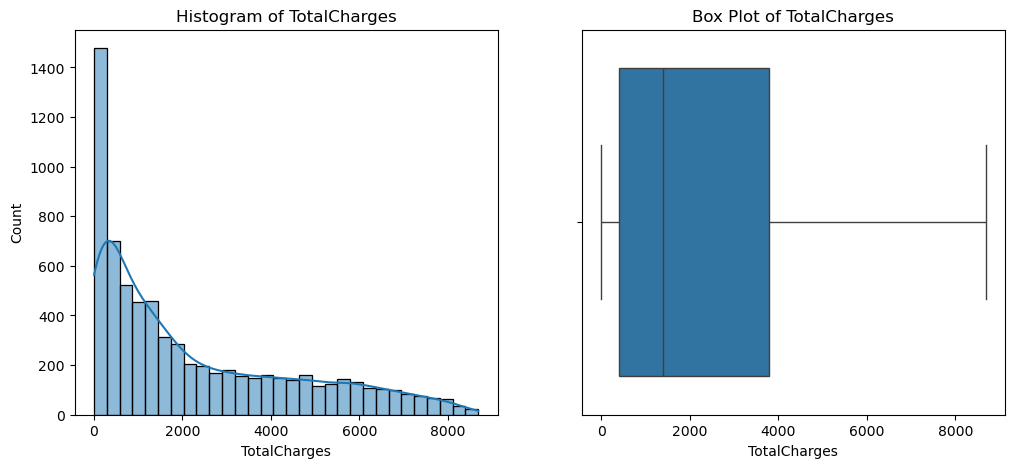

In [24]:
for column in numerical_columns:
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(customer_data[column], bins= 30, kde=True)
    plt.title(f"Histogram of {column}")

    plt.subplot(1,2,2)
    sns.boxplot(x=customer_data[column])
    plt.title(f"Box Plot of {column}")

    plt.show()

In [25]:
for column in numerical_columns:
    Q1 = customer_data[column].quantile(.25)
    Q3 = customer_data[column].quantile(.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = customer_data[(customer_data[column] < lower) | (customer_data[column] > upper)]
    print(f"Number of outliers in {column}: {len(outliers)}")
    print(outliers[[column]].head())

Number of outliers in tenure: 0
Empty DataFrame
Columns: [tenure]
Index: []
Number of outliers in MonthlyCharges: 0
Empty DataFrame
Columns: [MonthlyCharges]
Index: []
Number of outliers in TotalCharges: 0
Empty DataFrame
Columns: [TotalCharges]
Index: []


In [26]:
corr_numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

customer_data_numeric = customer_data[corr_numerical_columns]

correlation = customer_data_numeric.corr()

print("Numerical correlation with Churn:")
print(correlation['Churn'].drop('Churn'))

Numerical correlation with Churn:
tenure           -0.352229
MonthlyCharges    0.193356
TotalCharges     -0.198324
Name: Churn, dtype: float64


In [27]:
from scipy.stats import ttest_ind

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

churn_yes = customer_data[customer_data['Churn'] == 1]
churn_no = customer_data[customer_data['Churn'] == 0]

for column in numerical_columns:
    t_stat, p_value = ttest_ind(churn_yes[column].dropna(), churn_no[column].dropna())
    print(f"T-test for {column}:")
    print(f"T-statistic: {t_stat}, P-value: {p_value}\n")

T-test for tenure:
T-statistic: -31.57955051135377, P-value: 7.99905796059022e-205

T-test for MonthlyCharges:
T-statistic: 16.536738015936308, P-value: 2.7066456068884154e-60

T-test for TotalCharges:
T-statistic: -16.978779727124437, P-value: 2.127211613240394e-63



# Churn EDA

In [29]:
customer_data['Churn'].mean()

0.2653698707936959

# Introducing Synthetic Data

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [32]:
significant_variables = [
    'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'tenure', 'MonthlyCharges', 'TotalCharges'
]

In [33]:
model_data = customer_data[significant_variables + ['Churn']].copy()
model_data.dropna(inplace=True)

X = model_data.drop('Churn', axis=1)
y = model_data['Churn']

In [34]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

In [36]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

model_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Partner', 'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [37]:
np.random.seed(21)

In [38]:
def calculate_churn_probability(row):
    row_df = pd.DataFrame([row])
    churn_probability = model_pipeline.predict_proba(row_df)[:, 1][0]
    return churn_probability

In [39]:
def generate_synthetic_data(num_synthetic_rows):
    synthetic_data = []

    for _ in range(num_synthetic_rows):
        synthetic_row = {}

        synthetic_row['gender'] = np.random.choice(['Male', 'Female'], p=[0.5, 0.5])
        synthetic_row['SeniorCitizen'] = np.random.choice([0, 1], p=[0.84, 0.16])
        synthetic_row['Partner'] = np.random.choice(['No', 'Yes'], p=[0.52, 0.48])
        synthetic_row['Dependents'] = np.random.choice(['No', 'Yes'], p=[0.70, 0.30])
        synthetic_row['PhoneService'] = np.random.choice(['No', 'Yes'], p=[0.10, 0.90])
        synthetic_row['MultipleLines'] = np.random.choice(['No', 'Yes', 'No phone service'], p=[0.48, 0.42, 0.10])
        synthetic_row['InternetService'] = np.random.choice(['DSL', 'Fiber optic', 'No'], p=[0.34, 0.44, 0.22])

        if synthetic_row['InternetService'] == 'No':
            internet_dependent_services = 'No internet service'
        else:
            internet_dependent_services = np.random.choice(['Yes', 'No'], p=[0.40, 0.60])

        synthetic_row['OnlineSecurity'] = internet_dependent_services
        synthetic_row['OnlineBackup'] = internet_dependent_services
        synthetic_row['DeviceProtection'] = internet_dependent_services
        synthetic_row['TechSupport'] = internet_dependent_services
        synthetic_row['StreamingTV'] = internet_dependent_services
        synthetic_row['StreamingMovies'] = internet_dependent_services

        synthetic_row['Contract'] = np.random.choice(['Month-to-month', 'One year', 'Two year'], p=[0.55, 0.21, 0.24])
        synthetic_row['PaperlessBilling'] = np.random.choice(['No', 'Yes'], p=[0.40, 0.60])
        synthetic_row['PaymentMethod'] = np.random.choice(
            ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'],
            p=[0.34, 0.23, 0.22, 0.21]
        )

        if synthetic_row['Contract'] == 'Two year':
            synthetic_row['tenure'] = np.random.uniform(24, 72)
        elif synthetic_row['Contract'] == 'One year':
            synthetic_row['tenure'] = np.random.uniform(12, 24)
        else:
            synthetic_row['tenure'] = np.random.uniform(0, 12)

        if synthetic_row['InternetService'] == 'No':
            synthetic_row['MonthlyCharges'] = np.random.uniform(18.25, 35)
        else:
            synthetic_row['MonthlyCharges'] = np.random.uniform(35, 118.75)

        synthetic_row['TotalCharges'] = synthetic_row['tenure'] * synthetic_row['MonthlyCharges']

        churn_probability = calculate_churn_probability(synthetic_row)

        churn = np.random.choice([0, 1], p=[1 - churn_probability, churn_probability])

        synthetic_row['Churn'] = churn

        synthetic_data.append(synthetic_row)

    synthetic_data_df = pd.DataFrame(synthetic_data)
    return synthetic_data_df

In [40]:
# 25% of original data size
num_synthetic_rows = 1760
synthetic_data = generate_synthetic_data(num_synthetic_rows)

# Comparing Synthetic Data to Original

In [42]:
synthetic_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,10.408854,46.158893,480.461174,0
1,Male,1,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),9.129073,78.270990,714.541569,0
2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.377897,29.183664,565.518026,0
3,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),45.810735,23.374079,1070.783734,0
4,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic check,63.329100,26.082320,1651.769842,0


In [43]:
missing_values = synthetic_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
tenure              0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [44]:
synthetic_data.dtypes

gender               object
SeniorCitizen         int32
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
tenure              float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [45]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Original Data - Numerical Summary Statistics:")
print(customer_data[numerical_columns].describe())

print("\nSynthetic Data - Numerical Summary Statistics:")
print(synthetic_data[numerical_columns].describe())

Original Data - Numerical Summary Statistics:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

Synthetic Data - Numerical Summary Statistics:
            tenure  MonthlyCharges  TotalCharges
count  1760.000000     1760.000000   1760.000000
mean     18.750211       65.622827   1239.768053
std      18.939834       30.076575   1484.697648
min       0.004046       18.333209      0.442659
25%       5.463214       36.784593    276.877107
50%      10.752605       65.632667    676.209713
75%      23.686083       91.845858   1550.430478
max      71.897529      118.731661   8130.021527


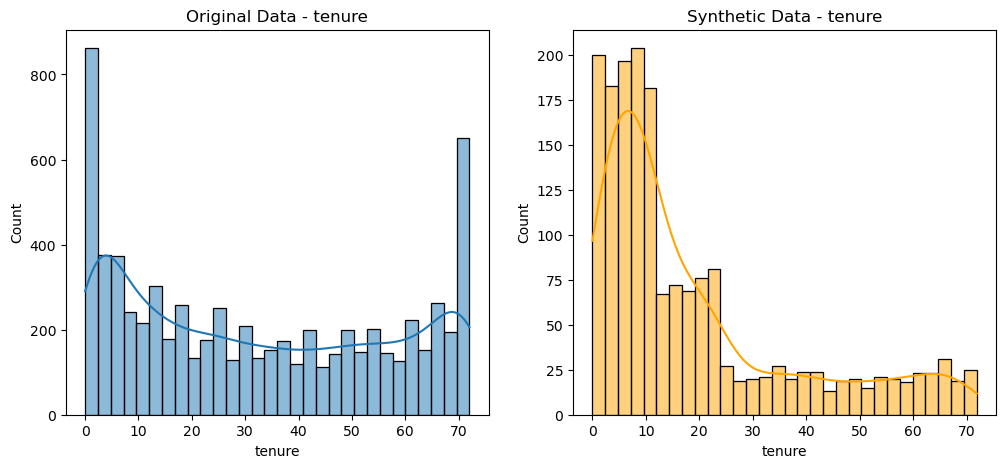

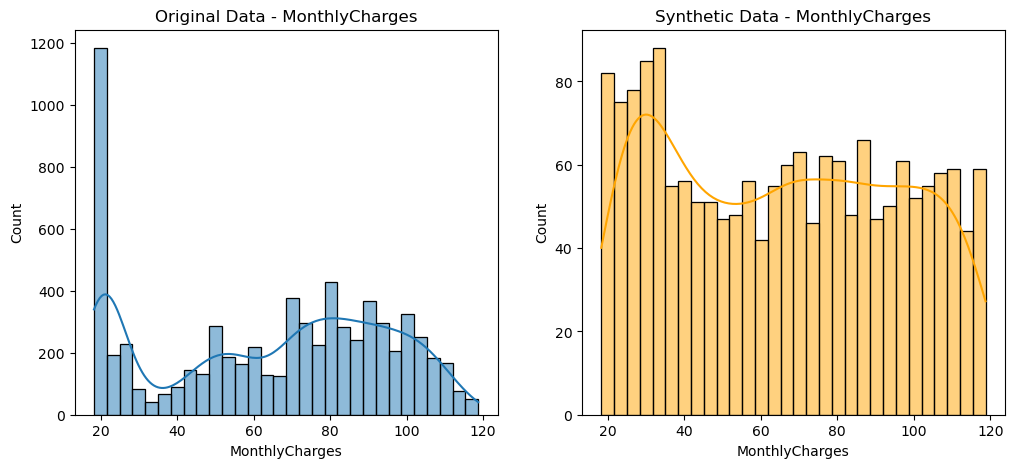

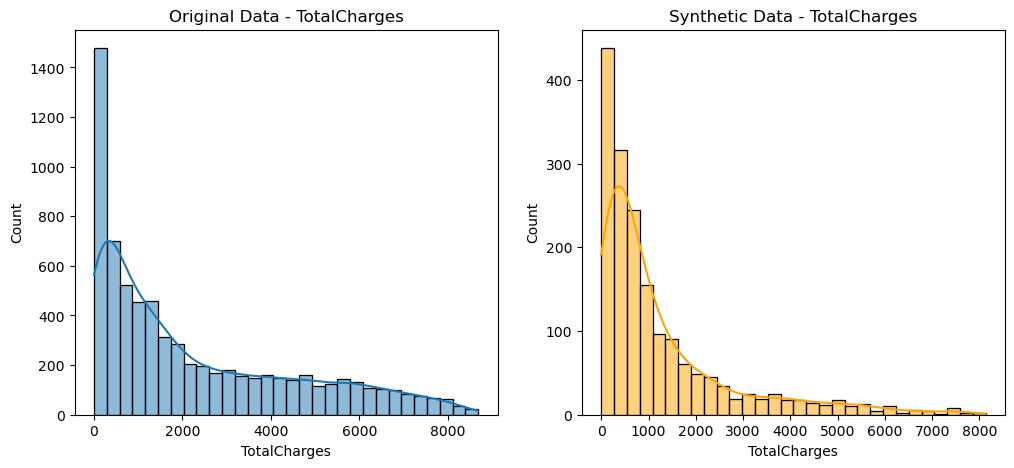

In [46]:
for column in numerical_columns:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(customer_data[column], bins=30, kde=True)
    plt.title(f"Original Data - {column}")
    
    plt.subplot(1, 2, 2)
    sns.histplot(synthetic_data[column], bins=30, kde=True, color='orange')
    plt.title(f"Synthetic Data - {column}")
    
    plt.show()

In [47]:
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

for column in categorical_columns:
    print(f"Value counts for {column} - Original Data:")
    print(customer_data[column].value_counts(normalize=True))
    print(f"\nValue counts for {column} - Synthetic Data:")
    print(synthetic_data[column].value_counts(normalize=True))
    print("\n" + "-"*50 + "\n")

Value counts for gender - Original Data:
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

Value counts for gender - Synthetic Data:
gender
Male      0.514205
Female    0.485795
Name: proportion, dtype: float64

--------------------------------------------------

Value counts for SeniorCitizen - Original Data:
SeniorCitizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64

Value counts for SeniorCitizen - Synthetic Data:
SeniorCitizen
0    0.842045
1    0.157955
Name: proportion, dtype: float64

--------------------------------------------------

Value counts for Partner - Original Data:
Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64

Value counts for Partner - Synthetic Data:
Partner
No     0.531818
Yes    0.468182
Name: proportion, dtype: float64

--------------------------------------------------

Value counts for Dependents - Original Data:
Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64


In [48]:
original_churn_rate = customer_data['Churn'].mean()
print(f"Original Data - Churn Rate: {original_churn_rate:.4f}")

synthetic_churn_rate = synthetic_data['Churn'].mean()
print(f"Synthetic Data - Churn Rate: {synthetic_churn_rate:.4f}")

Original Data - Churn Rate: 0.2654
Synthetic Data - Churn Rate: 0.2852


# EDA on Combined Dataset

In [50]:
combined_data = pd.concat([customer_data, synthetic_data], ignore_index=True)

In [51]:
print(f"there are {len(combined_data)} rows.")
print(f"there are {len(combined_data.columns)} columns.")

there are 8803 rows.
there are 20 columns.


In [52]:
missing_values = combined_data.isnull().sum()
print("Missing values in combined data:\n", missing_values)

Missing values in combined data:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [53]:
combined_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [54]:
combined_data[numerical_columns].describe()

,tenure,MonthlyCharges,TotalCharges
count,8803.000000,8803.000000,8803.000000
mean,29.647889,64.933861,2071.811936
std,24.164620,30.087617,2173.580973
min,0.000000,18.250000,0.000000
25%,7.295605,35.911192,351.525000
50%,23.000000,69.950000,1195.250000
75%,52.000000,90.050000,3297.000000
max,72.000000,118.750000,8684.800000


In [55]:
for column in categorical_columns:
    print(f"Value counts for {column} in combined data:")
    print(combined_data[column].value_counts(normalize=True))
    print("\n")

Value counts for gender in combined data:
gender
Male      0.506645
Female    0.493355
Name: proportion, dtype: float64


Value counts for SeniorCitizen in combined data:
SeniorCitizen
0    0.838691
1    0.161309
Name: proportion, dtype: float64


Value counts for Partner in combined data:
Partner
No     0.519936
Yes    0.480064
Name: proportion, dtype: float64


Value counts for Dependents in combined data:
Dependents
No     0.700216
Yes    0.299784
Name: proportion, dtype: float64


Value counts for PhoneService in combined data:
PhoneService
Yes    0.902874
No     0.097126
Name: proportion, dtype: float64


Value counts for MultipleLines in combined data:
MultipleLines
No                  0.477564
Yes                 0.426105
No phone service    0.096331
Name: proportion, dtype: float64


Value counts for InternetService in combined data:
InternetService
Fiber optic    0.438373
DSL            0.342042
No             0.219584
Name: proportion, dtype: float64


Value counts for Online

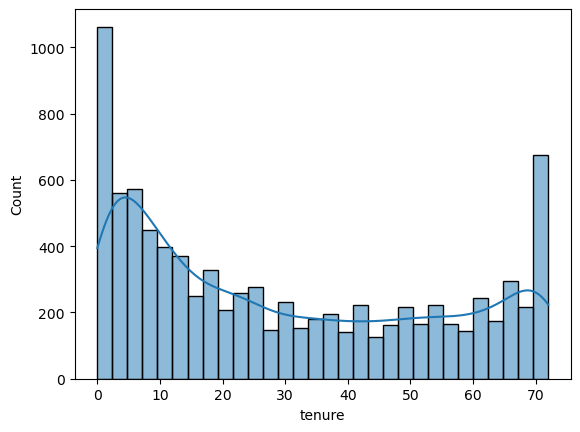

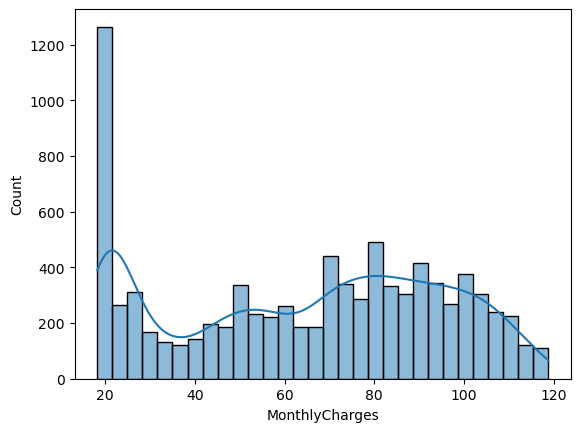

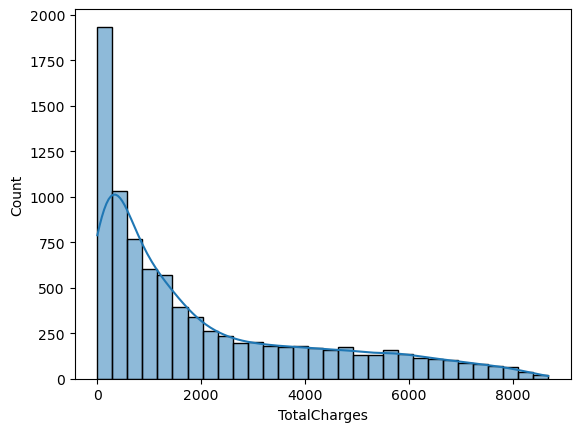

In [56]:
for column in numerical_columns:
    sns.histplot(combined_data[column], bins=30, kde=True)
    plt.show()

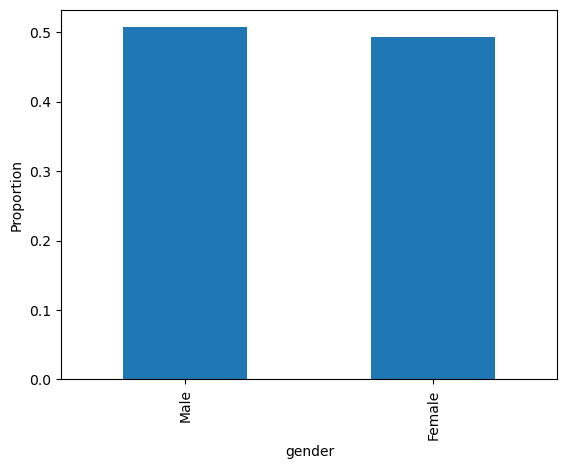

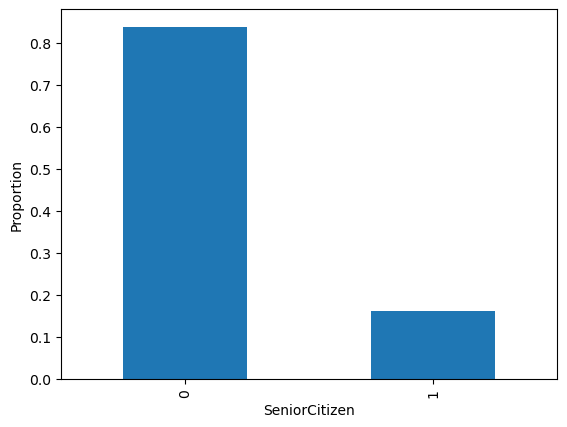

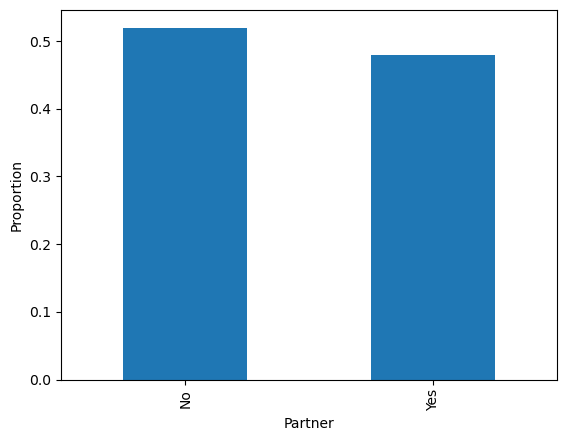

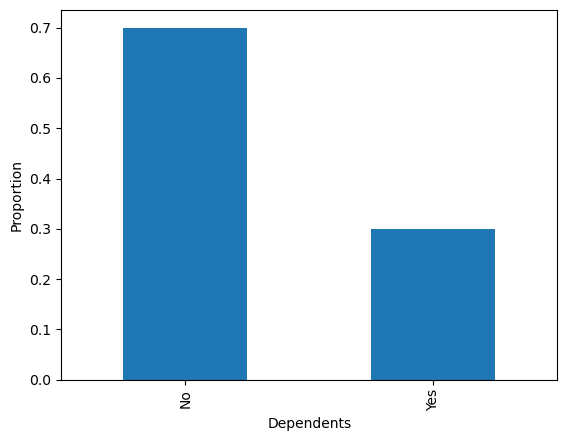

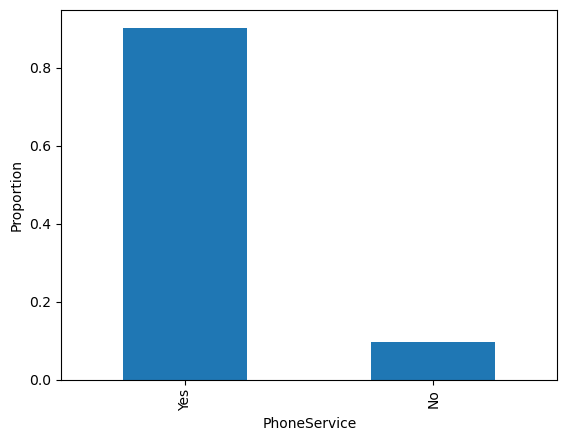

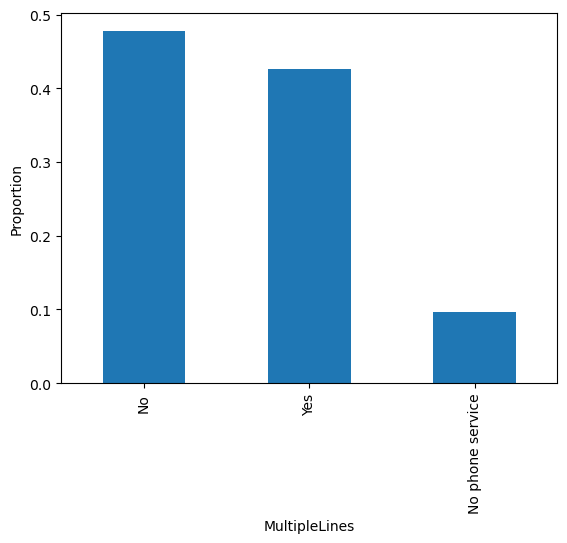

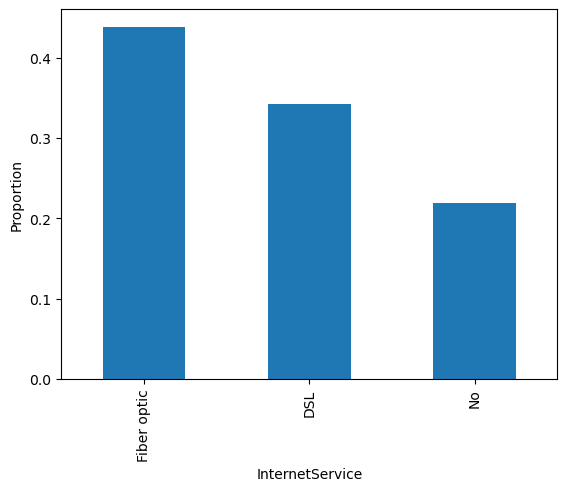

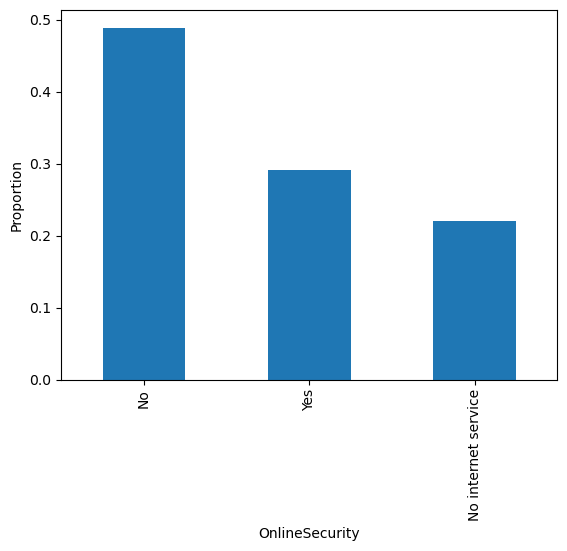

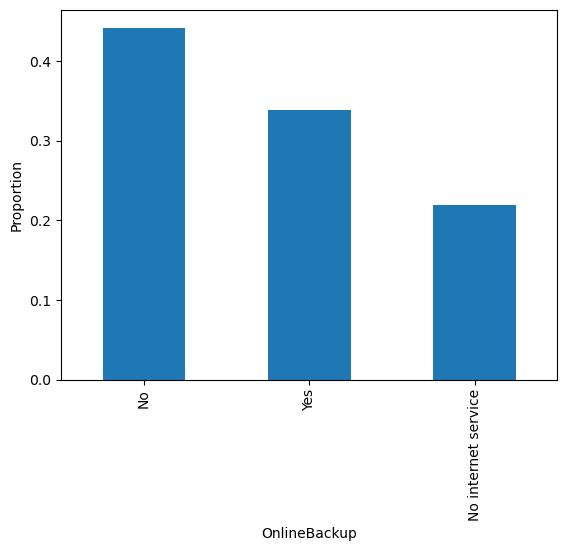

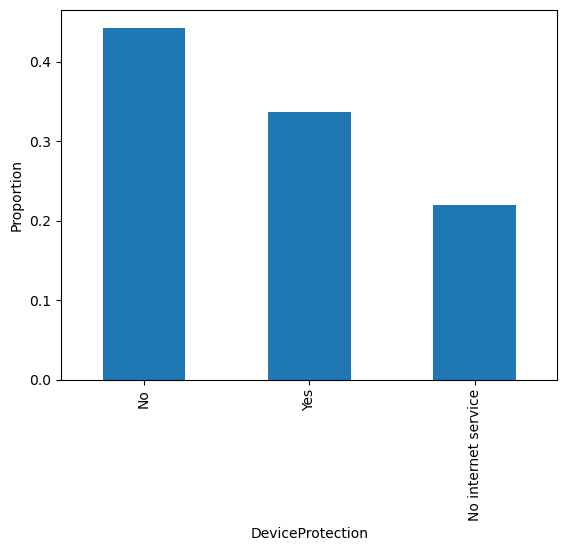

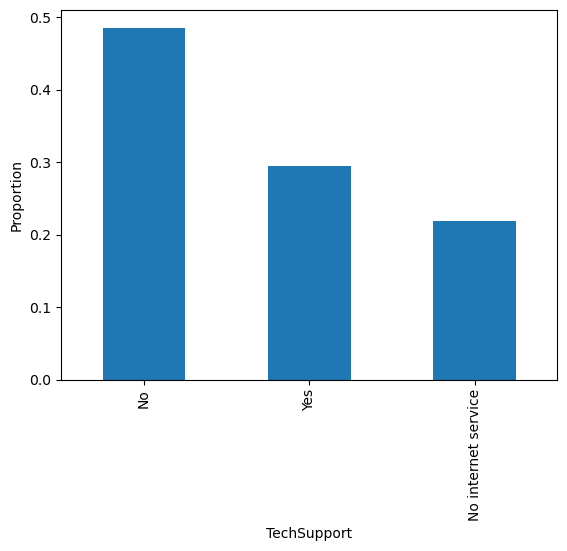

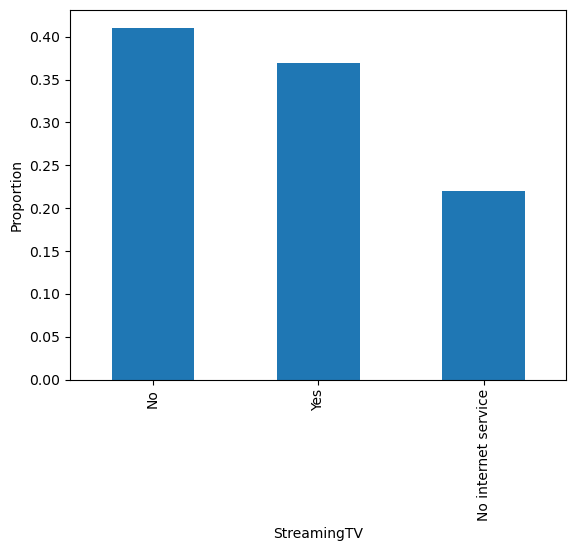

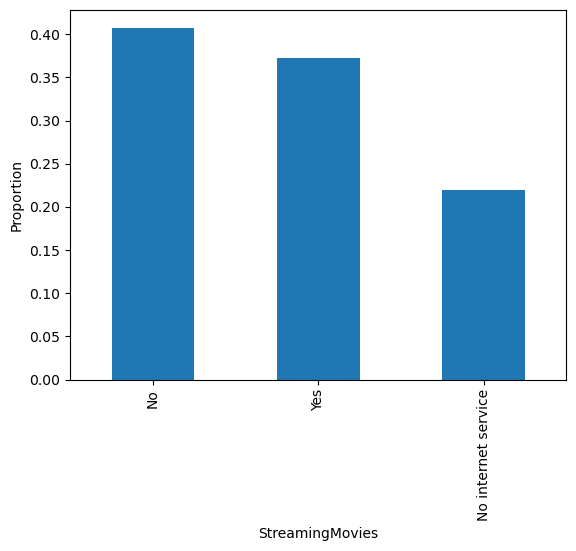

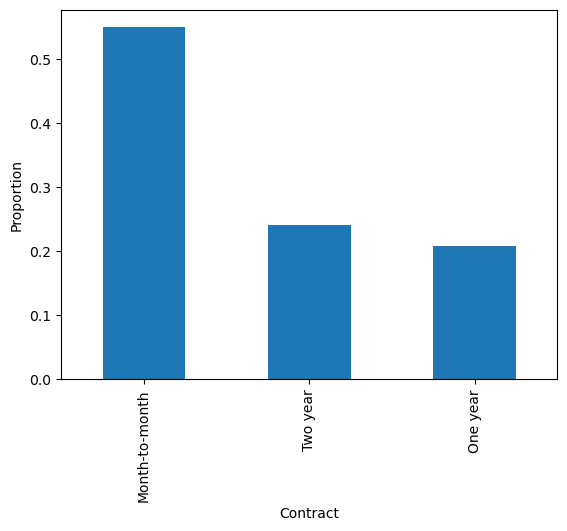

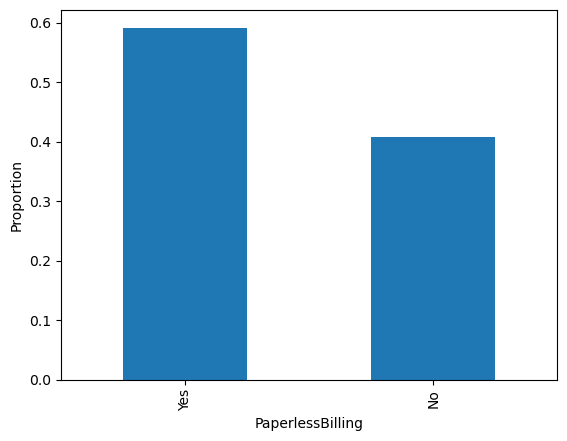

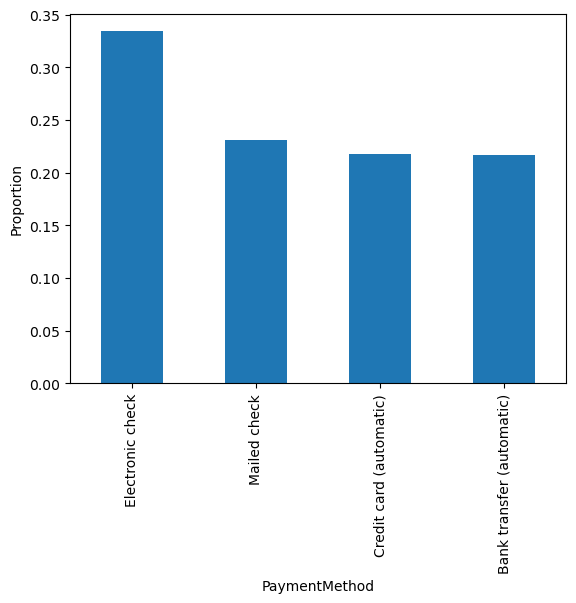

In [57]:
for column in categorical_columns:
    combined_data[column].value_counts(normalize=True).plot(kind='bar')
    plt.ylabel('Proportion')
    plt.show()

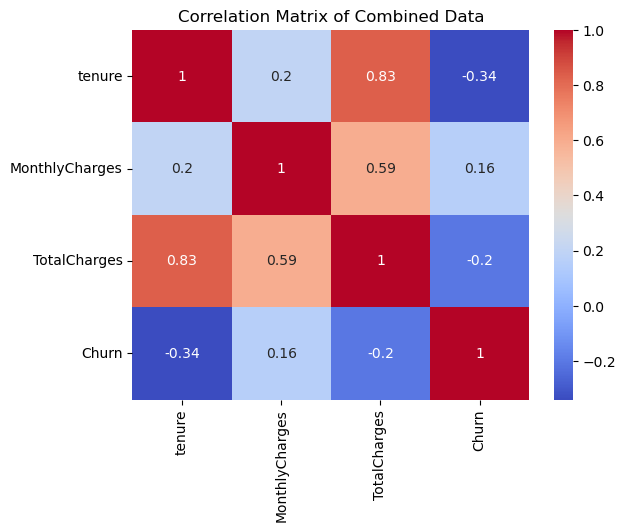

In [58]:
correlation_combined = combined_data[numerical_columns + ['Churn']].corr()
sns.heatmap(correlation_combined, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Combined Data')
plt.show()

In [59]:
combined_churn_rate = combined_data['Churn'].mean()
print(f"Churn Rate in Combined Data: {combined_churn_rate:.4f}")

original_churn_rate = customer_data['Churn'].mean()
print(f"Churn Rate in Original Data: {original_churn_rate:.4f}")

Churn Rate in Combined Data: 0.2693
Churn Rate in Original Data: 0.2654


# Basic Data Prep For Churn Models

In [61]:
combined_data = combined_data.dropna()

duplicate_count = combined_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    combined_data = combined_data.drop_duplicates()
    print(f"Duplicates removed. New dataset size: {combined_data.shape}")

Number of duplicate rows: 22
Duplicates removed. New dataset size: (8781, 20)


In [62]:
combined_data['TotalCharges'] = pd.to_numeric(combined_data['TotalCharges'], errors='coerce')

In [63]:
nan_total_charges = combined_data['TotalCharges'].isna().sum()
print(f"Number of NaNs in 'TotalCharges' after conversion: {nan_total_charges}")

Number of NaNs in 'TotalCharges' after conversion: 0


In [64]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [65]:
categorical_cols = combined_data.select_dtypes(include=['object']).columns.tolist()

if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [66]:
combined_data_encoded = pd.get_dummies(combined_data, columns=categorical_cols, drop_first=True)

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
combined_data_encoded[numerical_cols] = scaler.fit_transform(combined_data_encoded[numerical_cols])

In [68]:
X = combined_data_encoded.drop('Churn', axis=1)
y = combined_data_encoded['Churn']

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (7024, 30)
Test set size: (1757, 30)


# Model 1: Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [72]:
logreg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

In [73]:
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [74]:
y_pred_logreg = logreg.predict(X_test)

y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]

In [75]:
print("Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred_logreg))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

roc_auc = roc_auc_score(y_test, y_pred_prob_logreg)
print(f"ROC AUC Score: {roc_auc:.4f}")

Logistic Regression Performance:

              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1285
           1       0.50      0.83      0.63       472

    accuracy                           0.74      1757
   macro avg       0.71      0.77      0.71      1757
weighted avg       0.81      0.74      0.75      1757

Confusion Matrix:
[[900 385]
 [ 80 392]]
ROC AUC Score: 0.8371


In [76]:
feature_names = X.columns

coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logreg.coef_[0]
})

coefficients['AbsoluteCoefficient'] = coefficients['Coefficient'].abs()

coefficients.sort_values(by='AbsoluteCoefficient', ascending=False, inplace=True)

print("Top 10 Features Influencing Churn:\n")
print(coefficients.head(10)[['Feature', 'Coefficient']])

Top 10 Features Influencing Churn:

                           Feature  Coefficient
25               Contract_Two year    -1.394463
1                           tenure    -1.253382
10     InternetService_Fiber optic     1.005968
24               Contract_One year    -0.685172
3                     TotalCharges     0.581649
23             StreamingMovies_Yes     0.392887
28  PaymentMethod_Electronic check     0.390929
2                   MonthlyCharges    -0.358448
13              OnlineSecurity_Yes    -0.350130
21                 StreamingTV_Yes     0.304632


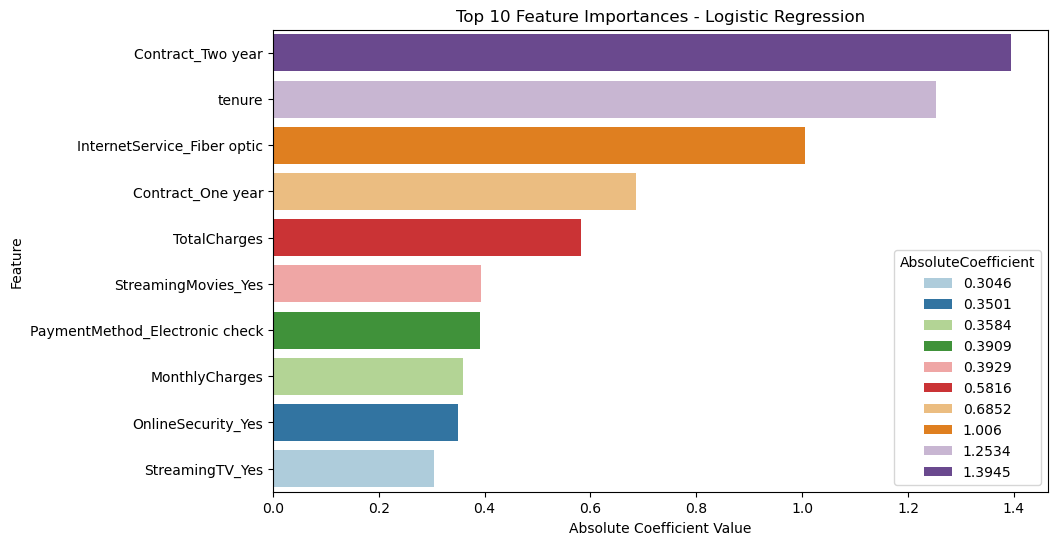

In [265]:
coefficients = coefficients.sort_values(by='AbsoluteCoefficient', ascending=False).head(10)

coefficients['AbsoluteCoefficient'] = coefficients['AbsoluteCoefficient'].round(4)

plt.figure(figsize=(10,6))
sns.barplot(x='AbsoluteCoefficient', y='Feature', data=coefficients.head(10), hue='AbsoluteCoefficient', palette='Paired', dodge=False)
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances - Logistic Regression')
plt.show()

In [77]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    logreg, X_train, y_train, cv=5, scoring='roc_auc'
)

print(f"Cross-validation ROC AUC scores: {cv_scores}")
print(f"Mean ROC AUC score: {cv_scores.mean():.4f}")

Cross-validation ROC AUC scores: [0.83509786 0.83078185 0.83280352 0.8181695  0.83804261]
Mean ROC AUC score: 0.8310


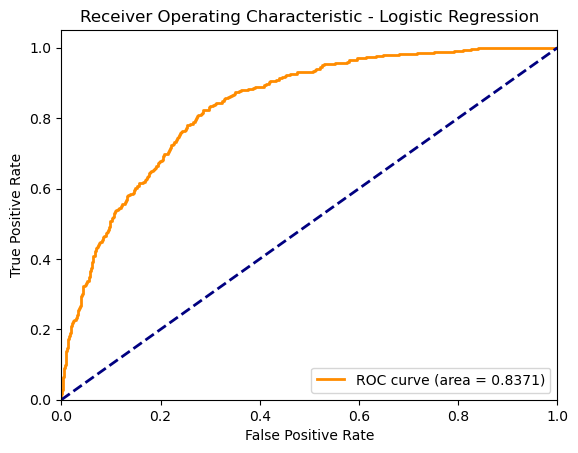

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_logreg)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

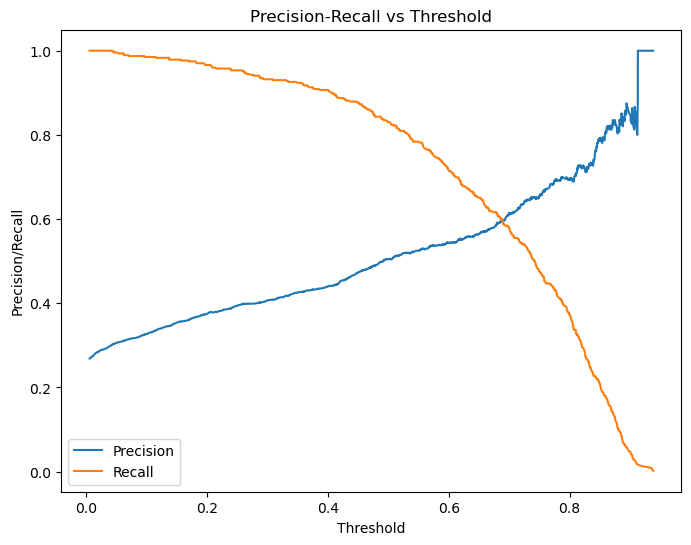

In [79]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_logreg)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.show()

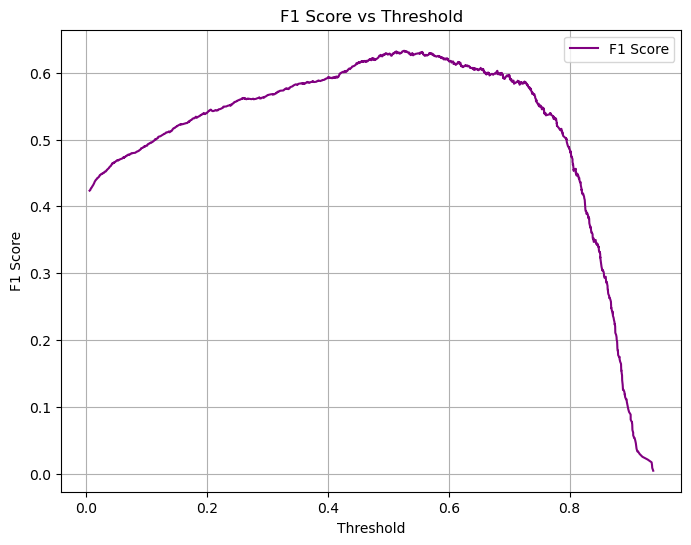

In [80]:
import numpy as np

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # Adding a small value to avoid division by zero

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='purple')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
max_f1_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[max_f1_idx]
print(f"Optimal Threshold based on F1 Score: {optimal_threshold:.2f}")

Optimal Threshold based on F1 Score: 0.53


In [82]:
y_pred_adjusted = (y_pred_prob_logreg >= optimal_threshold).astype(int)

print(f"Classification Report at Threshold = {optimal_threshold:.2f}:\n")
print(classification_report(y_test, y_pred_adjusted))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))

Classification Report at Threshold = 0.53:

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1285
           1       0.52      0.81      0.63       472

    accuracy                           0.75      1757
   macro avg       0.72      0.77      0.72      1757
weighted avg       0.81      0.75      0.76      1757

Confusion Matrix:
[[932 353]
 [ 90 382]]


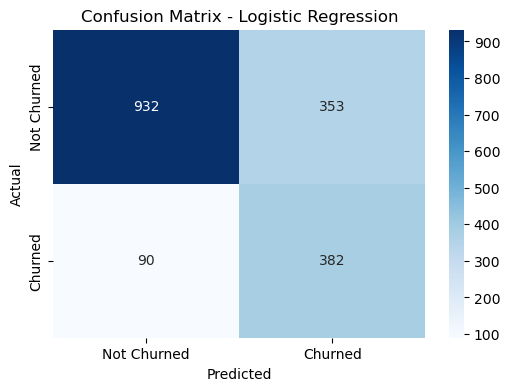

In [238]:
cm = confusion_matrix(y_test, y_pred_adjusted)

labels = ['Not Churned', 'Churned']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Model 2: Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [85]:
rforest = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

In [86]:
rforest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [87]:
y_pred_rf = rforest.predict(X_test)

y_pred_prob_rf = rforest.predict_proba(X_test)[:, 1]

In [88]:
print("Random Forest Classifier Performance:\n")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

Random Forest Classifier Performance:

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1285
           1       0.61      0.47      0.53       472

    accuracy                           0.78      1757
   macro avg       0.71      0.68      0.69      1757
weighted avg       0.76      0.78      0.77      1757

Confusion Matrix:
[[1139  146]
 [ 248  224]]
ROC AUC Score: 0.8109


In [89]:
importances = rforest.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print("Top 10 Important Features:\n")
print(feature_importances.head(10))

Top 10 Important Features:

                           Feature  Importance
1                           tenure    0.178725
3                     TotalCharges    0.176218
2                   MonthlyCharges    0.155215
25               Contract_Two year    0.064723
10     InternetService_Fiber optic    0.042450
28  PaymentMethod_Electronic check    0.031208
24               Contract_One year    0.027752
4                      gender_Male    0.025652
26            PaperlessBilling_Yes    0.023638
5                      Partner_Yes    0.022874


In [90]:
y_pred_prob_rf = rforest.predict_proba(X_test)[:, 1]

In [91]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_prob_rf)

f1_scores_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf + 1e-6)

In [92]:
max_f1_idx_rf = np.argmax(f1_scores_rf)
optimal_threshold_rf = thresholds_rf[max_f1_idx_rf]
print(f"Optimal Threshold based on F1 Score: {optimal_threshold_rf:.2f}")

Optimal Threshold based on F1 Score: 0.23


In [93]:
y_pred_adjusted_rf = (y_pred_prob_rf >= optimal_threshold_rf).astype(int)

In [94]:
print(f"Classification Report at Threshold = {optimal_threshold_rf:.2f}:\n")
print(classification_report(y_test, y_pred_adjusted_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted_rf))

print(f"ROC AUC Score: {roc_auc_rf:.4f}")

Classification Report at Threshold = 0.23:

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1285
           1       0.46      0.83      0.59       472

    accuracy                           0.70      1757
   macro avg       0.69      0.74      0.68      1757
weighted avg       0.79      0.70      0.71      1757

Confusion Matrix:
[[831 454]
 [ 81 391]]
ROC AUC Score: 0.8109


# Model 3: Decision Trees

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [97]:
dtree = DecisionTreeClassifier(
    max_depth=5,
    class_weight='balanced',
    random_state=42
)

In [98]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [99]:
y_pred_dtree = dtree.predict(X_test)

y_pred_prob_dtree = dtree.predict_proba(X_test)[:, 1]

In [100]:
print("Decision Tree Classifier Performance:\n")
print(classification_report(y_test, y_pred_dtree))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree))

roc_auc_dtree = roc_auc_score(y_test, y_pred_prob_dtree)
print(f"ROC AUC Score: {roc_auc_dtree:.4f}")

Decision Tree Classifier Performance:

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1285
           1       0.49      0.78      0.60       472

    accuracy                           0.72      1757
   macro avg       0.69      0.74      0.69      1757
weighted avg       0.79      0.72      0.74      1757

Confusion Matrix:
[[901 384]
 [105 367]]
ROC AUC Score: 0.8056


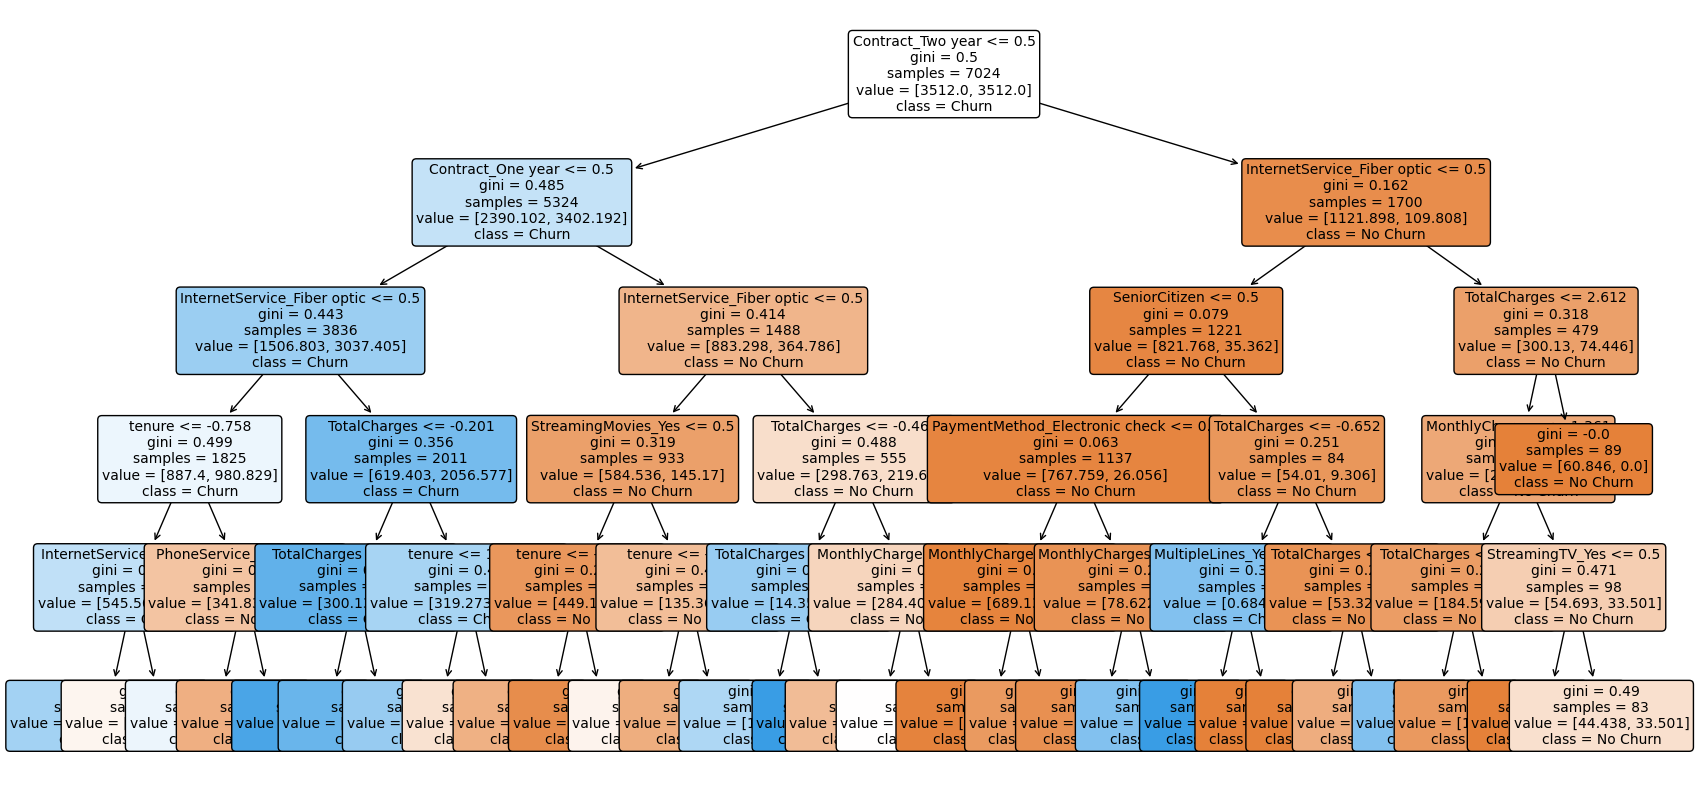

In [101]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(
    dtree,
    feature_names=feature_names,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

In [102]:
importances = dtree.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print("Top 10 Important Features:\n")
print(feature_importances.head(10))

Top 10 Important Features:

                        Feature  Importance
25            Contract_Two year    0.433139
24            Contract_One year    0.237992
10  InternetService_Fiber optic    0.149492
3                  TotalCharges    0.062869
1                        tenure    0.062287
11           InternetService_No    0.015040
2                MonthlyCharges    0.012756
7              PhoneService_Yes    0.012385
23          StreamingMovies_Yes    0.007533
21              StreamingTV_Yes    0.002877


In [103]:
y_pred_prob_dtree = dtree.predict_proba(X_test)[:, 1]

In [104]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_pred_prob_dtree)

f1_scores_dt = 2 * (precision_dt * recall_dt) / (precision_dt + recall_dt + 1e-6)

In [105]:
max_f1_idx_dt = np.argmax(f1_scores_dt)
optimal_threshold_dt = thresholds_dt[max_f1_idx_dt]
print(f"Optimal Threshold based on F1 Score: {optimal_threshold_dt:.2f}")

Optimal Threshold based on F1 Score: 0.65


In [106]:
y_pred_adjusted_dtree = (y_pred_prob_dtree >= optimal_threshold_dt).astype(int)

In [107]:
print(f"Classification Report at Threshold = {optimal_threshold_dt:.2f}:\n")
print(classification_report(y_test, y_pred_adjusted_dtree))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted_dtree))

print(f"ROC AUC Score: {roc_auc_dtree:.4f}")

Classification Report at Threshold = 0.65:

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1285
           1       0.51      0.75      0.60       472

    accuracy                           0.74      1757
   macro avg       0.70      0.74      0.70      1757
weighted avg       0.78      0.74      0.75      1757

Confusion Matrix:
[[939 346]
 [119 353]]
ROC AUC Score: 0.8056


# A/B Testing for Customer Retention

In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [110]:
df_ab_test = combined_data.copy()

In [111]:
eligible_customers = df_ab_test[df_ab_test['Contract'] != 'Two year'].copy()
existing_customers = df_ab_test[df_ab_test['Contract'] == 'Two year'].copy()

eligible_customers.reset_index(drop=True, inplace=True)

In [112]:
np.random.seed(42)
eligible_customers['Group'] = np.random.choice(['Control', 'Test'], size=len(eligible_customers), p=[0.5, 0.5])

control_group = eligible_customers[eligible_customers['Group'] == 'Control'].copy()
test_group = eligible_customers[eligible_customers['Group'] == 'Test'].copy()

In [113]:
acceptance_rate = 0.20

test_group['Accept_Offer'] = np.random.binomial(1, acceptance_rate, size=len(test_group))

accepted_offer = test_group['Accept_Offer'] == 1

test_group.loc[accepted_offer, 'Contract'] = 'Two year'

In [114]:
test_group.loc[accepted_offer, 'MonthlyCharges'] *= 0.85

test_group.loc[accepted_offer, 'tenure'] += 24

In [115]:
test_group.drop(columns=['Accept_Offer'], inplace=True)

eligible_customers_modified = pd.concat([control_group, test_group], ignore_index=True)

df_modified = pd.concat([existing_customers, eligible_customers_modified], ignore_index=True)

df_modified['Group'] = df_modified['Group'].fillna('Existing')

In [116]:
X = df_modified.drop(['Churn'], axis=1)
y = df_modified['Churn']

In [117]:
group_info = X['Group'].values

X = X.drop('Group', axis=1)


categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [118]:
X_train_ab, X_test_ab, y_train_ab, y_test_ab, group_train, group_test = train_test_split(
        X, y, group_info, test_size=0.3, random_state=42, stratify=y)

In [119]:
logreg_ab = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
logreg_ab.fit(X_train_ab, y_train_ab)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [120]:
y_pred_prob_logreg_ab = logreg_ab.predict_proba(X_test_ab)[:, 1]

In [121]:
threshold = 0.53
y_pred_logreg_ab = (y_pred_prob_logreg_ab >= threshold).astype(int)

print("Adjusted Logistic Regression Performance on Modified Dataset:\n")
print(classification_report(y_test_ab, y_pred_logreg_ab))
print("Confusion Matrix:")
print(confusion_matrix(y_test_ab, y_pred_logreg_ab))
roc_auc_ab = roc_auc_score(y_test_ab, y_pred_prob_logreg_ab)
print(f"ROC AUC Score: {roc_auc_ab:.4f}")

Adjusted Logistic Regression Performance on Modified Dataset:

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1927
           1       0.52      0.71      0.60       708

    accuracy                           0.75      2635
   macro avg       0.70      0.74      0.71      2635
weighted avg       0.78      0.75      0.76      2635

Confusion Matrix:
[[1465  462]
 [ 203  505]]
ROC AUC Score: 0.8215


In [122]:
df_test_results = pd.DataFrame({
        'Actual_Churn': y_test_ab,
        'Predicted_Churn': y_pred_logreg_ab,
        'Predicted_Probability': y_pred_prob_logreg_ab,
        'Group': group_test
    })

In [123]:
group_churn_rates = df_test_results.groupby('Group')['Predicted_Churn'].mean()
print("\nPredicted Churn Rates by Group:")
print(group_churn_rates)


Predicted Churn Rates by Group:
Group
Control     0.514804
Existing    0.011182
Test        0.437630
Name: Predicted_Churn, dtype: float64


In [124]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_test_results['Group'], df_test_results['Predicted_Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Squared Test:")
print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}")

if p < 0.05:
    print("Result: Significant difference in churn rates between groups.")
else:
    print("Result: No significant difference in churn rates between groups.")


Chi-Squared Test:
Chi2 Statistic: 460.2862, p-value: 0.0000
Result: Significant difference in churn rates between groups.


# Visualizations

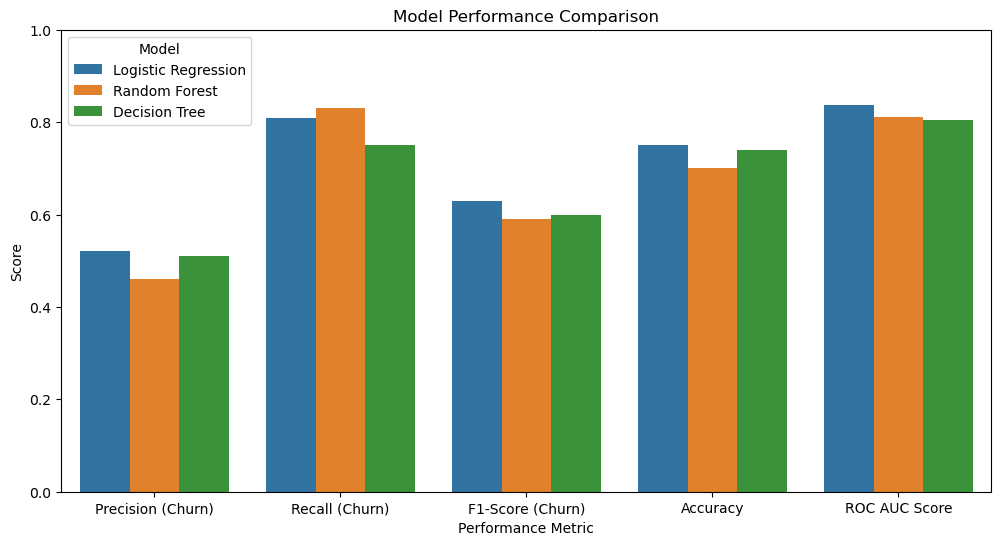

In [247]:
model_metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Precision (Churn)': [0.52, 0.46, 0.51],
    'Recall (Churn)': [0.81, 0.83, 0.75],
    'F1-Score (Churn)': [0.63, 0.59, 0.60],
    'Accuracy': [0.75, 0.70, 0.74],
    'ROC AUC Score': [0.8371, 0.8109, 0.8056]
}

metrics_df = pd.DataFrame(model_metrics)

metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(12,6))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted)
plt.ylim(0,1)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Performance Metric')
plt.legend(title='Model')
plt.show()

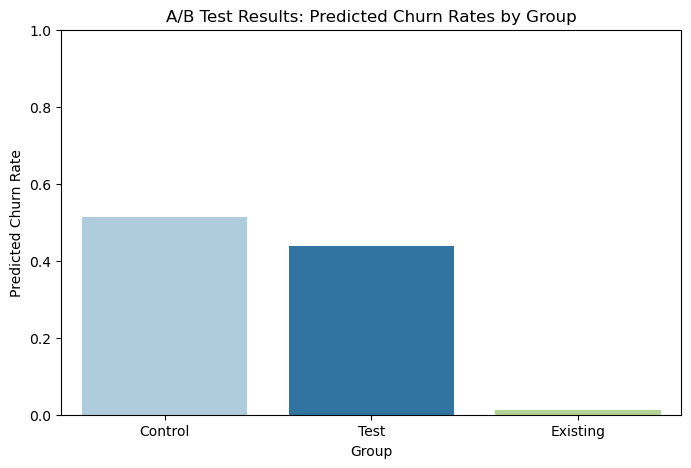

In [253]:
group_churn_rates = pd.Series({
    'Control': 0.514804,
    'Test': 0.437630,
    'Existing': 0.011182
})

plt.figure(figsize=(8,5))
sns.barplot(x=group_churn_rates.index, y=group_churn_rates.values, hue=group_churn_rates.index, palette='Paired', dodge=False)
plt.ylabel('Predicted Churn Rate')
plt.xlabel('Group')
plt.title('A/B Test Results: Predicted Churn Rates by Group')
plt.ylim(0,1)
plt.show()